In [14]:
import pandas as pd

def getTimes(filename):
    df = pd.read_csv(filename, sep=' ', header=None).values

    times = df[:,-1]
    return times

In [15]:
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + f"{decimals}" + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

In [16]:
import itertools
import time

solvers = ["bb", "brute"]
#solvers = ["bb"]
problems = ["NK4", "NK10", "NK15", "NK20", "NK22"]
#problems = ["NK30"]

program = "./main"

!mkdir output
for solver in solvers:
    !mkdir "output/{solver}"


for (problem, solver) in itertools.product(problems, solvers):
    print(f"{solver} - {problem}")
    output = open(f"./output/{solver}/{problem}_sol.dat", 'w')

    input = open(f"problems/{problem}_inst.dat", 'r')
    Lines = input.readlines()

    start = time.time()
    
    for index, line in enumerate(Lines, start=0):
        str = program + " " + solver + " " + line.strip()
        #print(str)

        res = !eval "{str}"
        res = res[0]
        
        output.write(f"{res}\n")

        printProgressBar(index + 1, len(Lines))

    end = time.time()
    print(end - start)
    print("")

    output.close()
    input.close()

mkdir: cannot create directory ‘output’: File exists
mkdir: cannot create directory ‘output/bb’: File exists
mkdir: cannot create directory ‘output/brute’: File exists
bb - NK4
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
4.69482421875

brute - NK4
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
5.093271493911743

bb - NK10
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
4.992828369140625

brute - NK10
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
4.9839026927948

bb - NK15
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
5.066067934036255

brute - NK15
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
8.83

In [32]:
from statistics import mean


problems = ["NK4", "NK10", "NK15", "NK20", "NK22"]
sizes = [4, 10, 15, 20, 22]

bb_min = []
bb_max = []
bb_mean = []

brute_min = []
brute_max = []
brute_mean = []

for problem in problems:
    bb = getTimes(f"output/bb/{problem}_sol.dat")
    brute = getTimes(f"output/brute/{problem}_sol.dat")

    bb_min.append(min(bb))
    bb_max.append(max(bb))
    bb_mean.append(mean(bb))

    brute_min.append(min(brute))
    brute_max.append(max(brute))
    brute_mean.append(mean(brute))

sizes,4,10,15,20,22
bb_min,0.000049,0.000063,0.000118,0.000097,0.000127
bb_mean,0.000141,0.000230,0.000655,0.004962,0.015491
bb_max,0.000450,0.000838,0.002059,0.039620,0.140096
brute_min,0.000053,0.000276,0.005302,0.266116,1.045980
brute_mean,0.000149,0.000486,0.007299,0.295309,1.141810
brute_max,0.000615,0.001277,0.030201,0.376028,1.231921


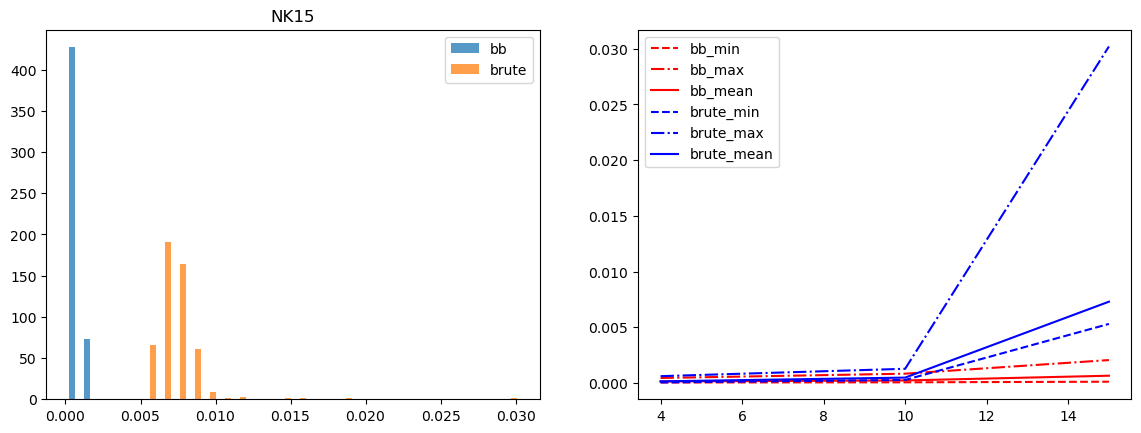

In [43]:
import matplotlib.pyplot as plt
hist_problem = problems[2]

timesbb = getTimes(f"output/bb/{hist_problem}_sol.dat")
timesbrute = getTimes(f"output/brute/{hist_problem}_sol.dat")

to_plot = []
labels = []

to_plot.append(timesbb)
labels.append("bb")

to_plot.append(timesbrute)
labels.append("brute")

fig, ax = plt.subplots(1,2)

fig.set_figwidth(14)

ax[0].hist(to_plot, alpha=0.75, label=labels, bins=30)
ax[0].set(title=hist_problem)
ax[0].legend()

limit = 3
psizes = sizes[:limit]

df = pd.DataFrame(data={
    'sizes': sizes,
    'bb_min': bb_min,
    'bb_mean': bb_mean,
    'bb_max': bb_max,
    'brute_min': brute_min,
    'brute_mean': brute_mean,
    'brute_max': brute_max,
})

df = df.set_index('sizes').transpose()

display(df)

ax[1].plot(psizes, bb_min[:limit], 'r--', label='bb_min')
ax[1].plot(psizes, bb_max[:limit], 'r-.', label='bb_max')
ax[1].plot(psizes, bb_mean[:limit], 'r', label='bb_mean')

ax[1].plot(psizes, brute_min[:limit], 'b--', label='brute_min')
ax[1].plot(psizes, brute_max[:limit], 'b-.', label='brute_max')
ax[1].plot(psizes, brute_mean[:limit], 'b', label='brute_mean')
ax[1].legend()

plt.show()